### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Exploratory Data Analysis

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
print("Train Shape; ", train_df.shape)
print("Test Shape; ", test_df.shape)

Train Shape;  (1460, 81)
Test Shape;  (1459, 80)


In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Here we list the correlation between the target and other features from the highest to the negative ones
#It seem the overall quality has the highest positive correlation with the target

train_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [6]:
test_df['SalePrice'] = np.nan
data = pd.concat([train_df, test_df], ignore_index=True)

ID = data['Id']
SalePrice = data['SalePrice']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

Skewness: 1.882876
Kurtosis: 6.536282


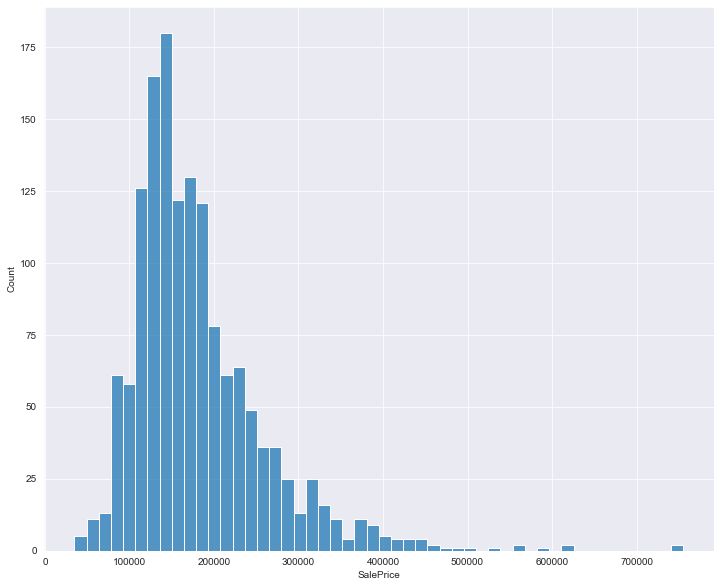

In [7]:
# The SalePrice is skewed to the right.SalePrice is not normally distributed, so we need to adjust it.

plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.histplot(data=SalePrice, bins=50,cbar=True)

print("Skewness: %f" % SalePrice.skew())
print("Kurtosis: %f" % SalePrice.kurt())

In [8]:
#Applying log transformation to remove skewness and make target variable normally distributed
SalePrice = np.log1p(SalePrice)

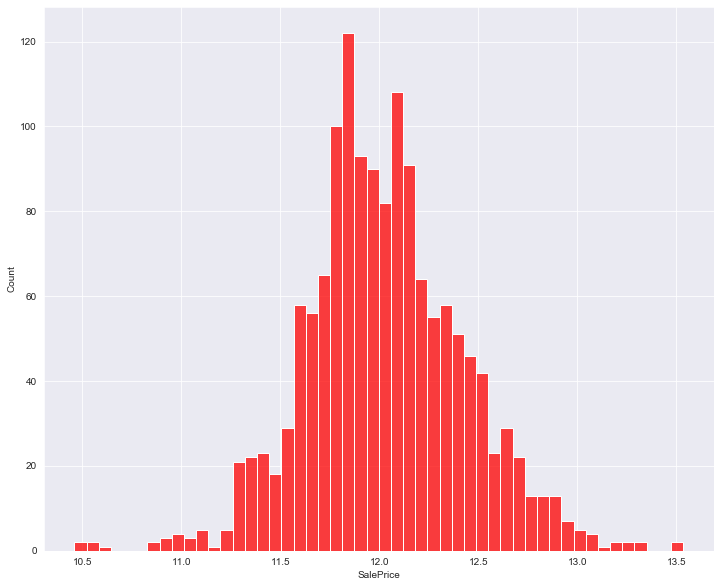

In [9]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.histplot(data=SalePrice, bins=50,cbar=True,color="red")
#Now it is normally distributed

In [10]:
def get_corr(dataset):
    corr = dataset.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, annot=False,linewidths=1,robust=True)
    print("Corr Shape : ",corr.shape)

Corr Shape :  (38, 38)


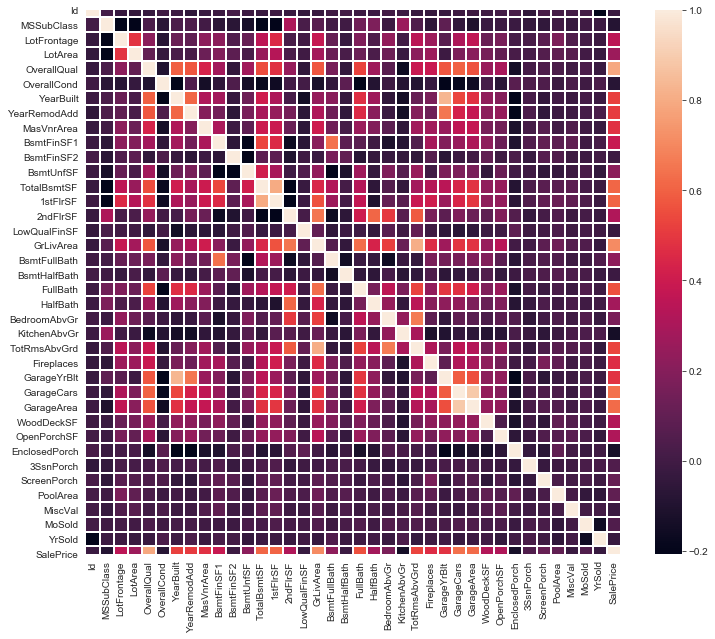

In [11]:
get_corr(data)

In [12]:
data = data.drop(['SalePrice'], 1)

In [13]:
numerical = data.select_dtypes(['int64', 'float64'])
categorical = data.select_dtypes('object')

num_cols=data.columns[data.dtypes!= "object"]
cat_cols=data.columns[data.dtypes== "object"]

print('Numerical Data : ', numerical.shape)
print('Categorical Data : ',categorical.shape)

Numerical Data :  (2919, 37)
Categorical Data :  (2919, 43)


In [14]:
def get_na(dataset):
    na_cols = []
    for k, v in dataset.isna().sum().iteritems():
        if v > 0:
            na_cols.append(k)
            
    return na_cols

In [15]:
get_na(data)

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [16]:
def numerical_na(dataset):
    for key, item in dataset.isna().sum().iteritems():
        if item > 0 and key in numerical and (item / dataset.shape[0])*100 < 20:
            dataset[key] = dataset[key].fillna(dataset[key].mean().round()).astype(int)
        
    return dataset

In [17]:
numerical_na(data).isna().sum().sort_values(ascending=False)

PoolQC         2909
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
               ... 
CentralAir        0
HeatingQC         0
TotalBsmtSF       0
BsmtUnfSF         0
Id                0
Length: 80, dtype: int64

In [18]:
categorical_na_cols = []

def categorical_na(dataset):
    for key, item in dataset.isna().sum().iteritems():
        if item > 0 and key in categorical and (item / dataset.shape[0])*100 < 20:
            print(key, item)
            categorical_na_cols.append(key)
            
categorical_na(data)

MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 24
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinType2 80
Electrical 1
KitchenQual 1
Functional 2
GarageType 157
GarageFinish 159
GarageQual 159
GarageCond 159
SaleType 1


In [19]:
data['Electrical'].value_counts(dropna=False)

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [20]:
data["Electrical"]= data["Electrical"].fillna("SBrkr")

In [21]:
train_df['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [22]:
data['MasVnrType'].value_counts(dropna=False)

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

In [23]:
data['MasVnrType'] = data["MasVnrType"].fillna("None")

In [24]:
data['MasVnrType'].value_counts(dropna=False)

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [25]:
categorical_na(train_df)

MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [26]:
# Imputing the missing values
def cat_imputation(column, value):
    train_df.loc[train_df[column].isnull(),column] = value

In [27]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
data[basement_cols][data['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


In [28]:
for cols in basement_cols:
    if 'FinSF'not in cols:
        cat_imputation(cols,'None')

In [29]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
data[garage_cols][data['GarageType'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,1978,NaN,0,0
48,NaN,NaN,NaN,1978,NaN,0,0
78,NaN,NaN,NaN,1978,NaN,0,0
88,NaN,NaN,NaN,1978,NaN,0,0
89,NaN,NaN,NaN,1978,NaN,0,0
99,NaN,NaN,NaN,1978,NaN,0,0
108,NaN,NaN,NaN,1978,NaN,0,0
125,NaN,NaN,NaN,1978,NaN,0,0
127,NaN,NaN,NaN,1978,NaN,0,0
140,NaN,NaN,NaN,1978,NaN,0,0


In [30]:
#Garage Imputation
for cols in garage_cols:
    if data[cols].dtype==np.object:
        cat_imputation(cols,'None')
    else:
        cat_imputation(cols, 0)

In [31]:
categorical_na(data)

MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinType2 80
KitchenQual 1
Functional 2
GarageType 157
GarageFinish 159
GarageQual 159
GarageCond 159
SaleType 1


In [32]:
data['MSZoning'].value_counts(dropna=False)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

In [33]:
data["MSZoning"]= data["MSZoning"].fillna("RL")

In [34]:
data['MSZoning'].value_counts(dropna=False)

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [35]:
data['Utilities'].value_counts(dropna=False)

AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [36]:
data['Utilities'].mode()

0    AllPub
dtype: object

In [37]:
for key, item in data.isna().sum().iteritems():
    if item > 0 and key in categorical and (item / data.shape[0])*100 < 20:
        data[key] = data[key].fillna(data[key].mode()[0])

In [38]:
categorical_na(data)

In [39]:
numerical_na(data).isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [40]:
for key, item in data.isna().sum().iteritems():
    if item > 0 and (item / data.shape[0])*100 > 20:
        print(key)

Alley
FireplaceQu
PoolQC
Fence
MiscFeature


In [41]:
data = data.drop(['Alley'], 1)

In [42]:
data = data.drop(['FireplaceQu'], 1)

In [43]:
data = data.drop(['PoolQC'], 1)

In [44]:
data = data.drop(['Fence'], 1)

In [45]:
data = data.drop(['MiscFeature'], 1)

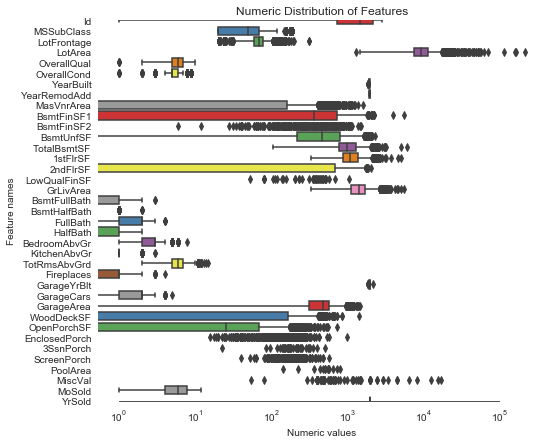

In [46]:
# Fixing the Skewness of numerical columns

# Creating box plots for all numeric columns:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=data[num_cols] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [47]:
# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

skew(a, axis=0, bias=True, nan_policy='propagate') Compute the sample skewness of a data set.

For normally distributed data, the skewness should be about zero. For
unimodal continuous distributions, a skewness value greater than zero means
that there is more weight in the right tail of the distribution. The
function `skewtest` can be used to determine if the skewness value
is close enough to zero, statistically speaking.

In [48]:
# Finding skewed numerical columns:
skew_columns = data[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_columns[skew_columns > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_columns

There are 26 numerical features with Skew > 0.5 :


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146031
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.611576
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.652671
1stFlrSF          1.469604
BsmtFinSF1        1.425234
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.162483
BsmtUnfSF         0.919508
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.241217
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
Id                0.000000
GarageCars       -0.218593
GarageYrBlt      -0.392044
YearRemodAdd     -0.451020
YearBuilt        -0.599806
d

boxcox_normmax(x, brack=(-2.0, 2.0), method='pearsonr') Compute optimal Box-Cox transform parameter for input data.

In [49]:
# Lets normalize skewed features
for i in skew_index:
    data[i] = boxcox1p(data[i], boxcox_normmax(data[i] + 1))

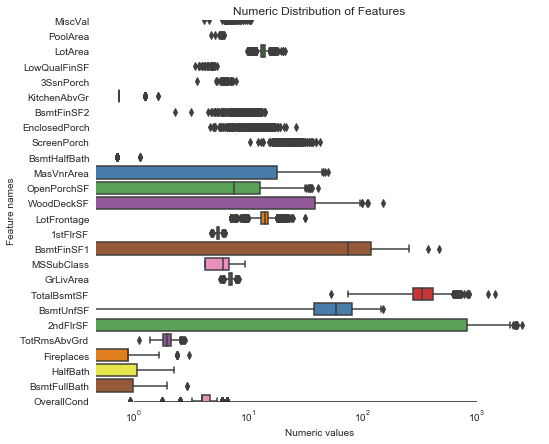

In [50]:
# Let's make sure we handled all the skewed values

sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=data[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)
#Now all the numerical seems to be normally distributed

In [51]:
from sklearn import preprocessing

for col in data.columns:
    if col in categorical:
        dummy = pd.get_dummies(data[[col]])
        data = pd.concat([data, dummy], axis=1)
        
        data = data.drop([col], axis=1)
        

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 271 entries, Id to SaleCondition_Partial
dtypes: float64(26), int32(3), int64(8), uint8(234)
memory usage: 1.4 MB


In [53]:
data.shape

(2919, 271)

In [54]:
SalePrice.shape

(2919,)

### Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

X = pd.concat([data[:1460], SalePrice[:1460]], axis=1)
y = data[1459:]

X.shape

(1460, 272)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Select and Training a Model

In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

def best_hyperparams(model, grid_dict, train_data, test_data):
    
    grid = grid_dict

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(train_data, test_data)

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [59]:
lr_model.fit(data[:1460], SalePrice[:1460])
lr_pred = lr_model.predict(data[1460:])

### Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [61]:
dtree.fit(data[:1460], SalePrice[:1460])
dtree_pred = dtree.predict(data[1460:])

### Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

In [63]:
random_forest.fit(data[:1460], SalePrice[:1460])
rf_pred = random_forest.predict(data[1460:])

### Ensemble Methods

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.00015))

In [65]:
svr.fit(data[:1460], SalePrice[:1460])
svr_pred = svr.predict(data[1460:])

In [66]:
# Define XG-Boost Model
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006, random_state=42)

In [67]:
xgb.fit(data[:1460], SalePrice[:1460])
pred_xgb = xgb.predict(data[1460:])

[20:42:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


GradientBoostingRegressor:

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

In [69]:
gbr.fit(data[:1460], SalePrice[:1460])
gbr_pred = gbr.predict(data[1460:])

### DNN

In [70]:
import tensorflow as tf

In [71]:
tf.keras.layers.Dense(5, kernel_initializer='normal', activation='relu'),
tf.keras.layers.Dense(5, kernel_initializer='normal', activation='relu'),

(<tensorflow.python.keras.layers.core.Dense at 0x231bf1f4438>,)

In [72]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(100, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(50, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(25, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(np.array(data[:1460]), np.array(SalePrice[:1460]), epochs=100, batch_size=10)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1460/1460 [==============================] - 2s 2ms/sample - loss: 1.4464
Epoch 2/100
1460/1460 [==============================] - 0s 340us/sample - loss: 0.0660
Epoch 3/100
1460/1460 [==============================] - 0s 321us/sample - loss: 0.0710
Epoch 4/100
1460/1460 [==============================] - 0s 342us/sample - loss: 0.0584
Epoch 5/100
1460/1460 [==============================] - 0s 326us/sample - loss: 0.0889
Epoch 6/100
1460/1460 [==============================] - 0s 332us/sample - loss: 0.0561
Epoch 7/100
1460/1460 [==============================] - 0s 328us/sample - loss: 0.0470
Epoch 8/100
1460/1460 [==============================] - 1s 347us/sample - loss: 0.0694
Epoch 9/100
1460/1460 [==============================] - 1s 344us/sample - loss: 0.0592s - loss: 0.06
Epoch 10/100
1460/1460 [====

1460/1460 [==============================] - 0s 316us/sample - loss: 0.0212
Epoch 82/100
1460/1460 [==============================] - 0s 319us/sample - loss: 0.0282s - loss: 0.0
Epoch 83/100
1460/1460 [==============================] - 0s 325us/sample - loss: 0.0315
Epoch 84/100
1460/1460 [==============================] - 0s 303us/sample - loss: 0.0352
Epoch 85/100
1460/1460 [==============================] - 0s 303us/sample - loss: 0.0310
Epoch 86/100
1460/1460 [==============================] - 0s 323us/sample - loss: 0.0244
Epoch 87/100
1460/1460 [==============================] - 0s 305us/sample - loss: 0.0278
Epoch 88/100
1460/1460 [==============================] - 0s 314us/sample - loss: 0.0248
Epoch 89/100
1460/1460 [==============================] - 0s 306us/sample - loss: 0.0239
Epoch 90/100
1460/1460 [==============================] - 0s 313us/sample - loss: 0.0197
Epoch 91/100
1460/1460 [==============================] - 0s 312us/sample - loss: 0.0199
Epoch 92/100
1460/146

In [73]:
dnn_pred = model.predict(data[1460:])

In [74]:
dnn_pred = dnn_pred.reshape(1459, )

In [75]:
dnn_pred.shape


(1459,)

### Stacking Models|

In [76]:
from vecstack import stacking

models = [xgb, gbr, model]

In [77]:
from sklearn.metrics import mean_squared_error
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

In [ ]:
S_train, S_test = stacking(models,
                           data[:1460], SalePrice[:1460], data[1460:],
                           regression=True,
                           mode='oof_pred_bag',
                           metric=rmse,
                           n_folds=5,
                           random_state=25,
                           verbose=2
                          )

## Submitting Prediction

In [79]:
prediction = pd.DataFrame({'Id': ID[1460:], 'SalePrice': dnn_pred})
prediction.shape

(1459, 2)

In [80]:
prediction.to_csv('dnn_pred5.csv', index=False)